In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
csv = 'EBOV-Cyno-Aero-1.csv-Table 1.csv'

In [3]:
csv = 'default'

In [4]:
# Parameters
csv = "MARV-Rhesus-Aero.csv-Table 1.csv"


In [5]:
df = pd.read_csv(csv)

# Get Summary Statistics

In [6]:
df.drop(['Day', 'TimeS'], axis=1).describe()

,AOPSystolic_Mean,AOPSystolic_Q25,AOPSystolic_Q75,AOPDiastolic_Mean,AOPDiastolic_Q25,AOPDiastolic_Q75,RespMean_Mean,RespMean_Q25,RespMean_Q75,Temp_Mean,...,ITPDepth_Mean,ITPDepth_Q25,ITPDepth_Q75,APP_Mean,APP_Q25,APP_Q75,ANP_Mean,ANP_Q25,ANP_Q75,Y
count,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,...,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000,3448.000000
mean,-0.099519,-0.518315,0.270777,-0.312092,-0.754803,0.100582,0.333528,-0.121526,0.779768,2.266281,...,-0.076835,-0.643601,0.342063,-0.009656,-0.558428,0.411999,-0.195998,-0.732287,0.216978,0.513341
std,1.429499,1.386841,1.499306,1.361611,1.329525,1.408053,1.259939,1.289021,1.325681,4.734170,...,0.665456,0.561571,0.814911,0.661655,0.541271,0.812603,0.672092,0.537242,0.833693,0.499894
min,-10.357273,-10.922669,-9.916637,-10.939830,-11.187783,-10.876376,-4.857199,-7.613779,-2.780191,-11.196541,...,-2.757225,-3.233503,-2.560842,-2.578690,-2.715340,-2.653933,-2.764607,-2.900619,-2.789524,0.000000
25%,-0.629598,-1.037162,-0.334415,-0.779765,-1.209231,-0.394361,-0.463914,-0.933810,-0.067657,-0.334512,...,-0.438388,-0.942258,-0.128266,-0.347583,-0.848039,-0.024385,-0.520856,-0.980574,-0.246728,0.000000
50%,-0.101547,-0.534888,0.296293,-0.193828,-0.671863,0.230006,0.170465,-0.294361,0.619467,0.426143,...,-0.090334,-0.663475,0.312582,-0.032810,-0.609035,0.400121,-0.173995,-0.727626,0.243791,1.000000
75%,0.634120,0.177147,1.019730,0.399196,-0.078347,0.859992,0.865989,0.455805,1.311725,2.435568,...,0.276156,-0.354334,0.767672,0.320134,-0.298858,0.814733,0.161403,-0.474086,0.674996,1.000000
max,8.875209,8.117285,10.527633,4.792388,4.248105,5.614687,7.398475,6.788758,8.627414,32.095655,...,7.755238,6.132094,9.452843,8.861428,6.755588,10.637572,8.499110,6.395511,10.192488,1.000000


# Get Sampling Info for All of Subjects - Is it consistent?

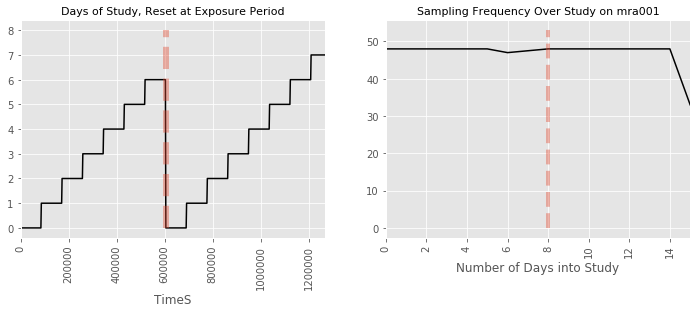

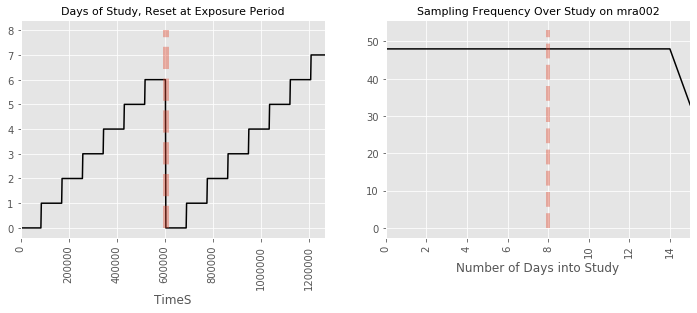

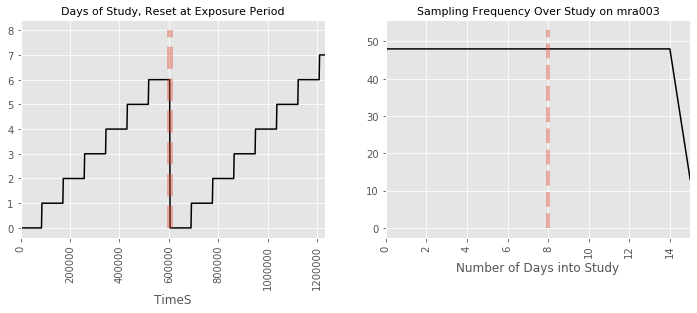

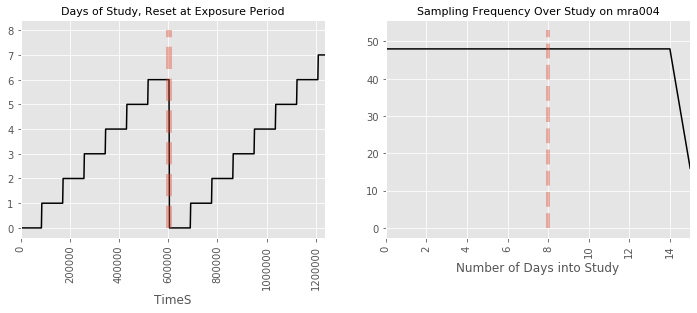

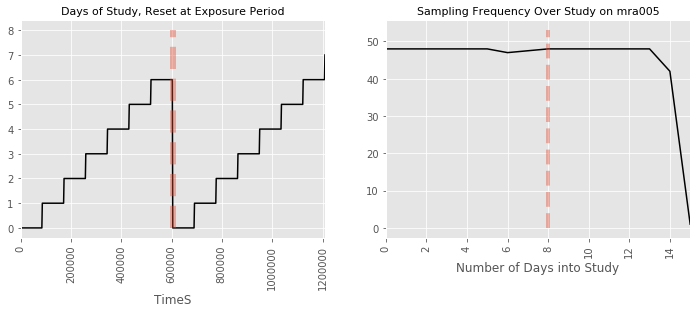

In [7]:
def sampling_analysis(subject):
    df_subj = df[df['SubjectName'] == subject]

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    num_days = len(np.unique(df_subj['Day']))
    first_exposed = df_subj.loc[df_subj.Y == 1]['TimeS'].to_list()[0]
    df_subj.plot(x='TimeS', y='Day', color='black', legend=False, subplots=True, ax=ax[0], rot=90)
    ax[0].plot([first_exposed, first_exposed], [0, num_days], lw=6, alpha=0.4, ls='--')
    ax[0].set_title("Days of Study, Reset at Exposure Period", fontsize=11)

    sampling_freqs = []
    exposed = []
    days = []

    for i in range(0, 2):
        for day in np.unique(df_subj.Day):
            num_obvs = len(df_subj.loc[df_subj.Y == i]
            .loc[df_subj.Day == day])
            days.append(day)
            exposed.append(i)
            sampling_freqs.append(num_obvs)

    sampling_freqs = pd.DataFrame(list(zip(days, exposed, sampling_freqs)), columns=['Day', 'Exposed', 'Sampling Frequency'])
    sampling_freqs = sampling_freqs[sampling_freqs['Sampling Frequency'] != 0]

    sampling_freqs.plot(y='Sampling Frequency', legend=False, color='black', subplots=True, ax=ax[1])
    exposed_start = sampling_freqs.loc[sampling_freqs['Exposed'] == 1].index[0]
    ax[1].plot([exposed_start, exposed_start], [0, max(sampling_freqs['Sampling Frequency'] + 5)], lw=4, alpha=0.4, ls='--')
    plt.xticks(rotation=90)
    plt.xlabel('Number of Days into Study')
    ax[1].set_title('Sampling Frequency Over Study on ' + subject, fontsize=11)

subjects = list(np.unique(df['SubjectName']))
for subject in subjects:
    sampling_analysis(subject)

In [8]:
time_steps = []
exposed_at = []

for subject in subjects:
    time_steps.append(max(df[df['SubjectName'] == subject]['TimeS']))
    exposed_at.append(min(df[(df['SubjectName'] == subject) & (df['Y'] == 1)]['TimeS']))

exposed_when = [i / j for i, j in zip(exposed_at, time_steps)]

length_exposed_df = pd.DataFrame(list(zip(subjects, time_steps, exposed_at, exposed_when)), columns=['SubjectName', 'Num_TimeS', 'TimeS_Exposed', 'StudyProgress_Exposed'])
length_exposed_df = length_exposed_df.set_index('SubjectName')
length_exposed_df

,Num_TimeS,TimeS_Exposed,StudyProgress_Exposed
SubjectName,,,
mra001,1267200,604800,0.477273
mra002,1267200,604800,0.477273
mra003,1231200,604800,0.491228
mra004,1236600,604800,0.489083
mra005,1209600,604800,0.500000


In [9]:
length_exposed_df.describe()

,Num_TimeS,TimeS_Exposed,StudyProgress_Exposed
count,5.000000e+00,5.0,5.000000
mean,1.242360e+06,604800.0,0.486971
std,2.482434e+04,0.0,0.009753
min,1.209600e+06,604800.0,0.477273
25%,1.231200e+06,604800.0,0.477273
50%,1.236600e+06,604800.0,0.489083
75%,1.267200e+06,604800.0,0.491228
max,1.267200e+06,604800.0,0.500000


Text(0.5, 1.0, '# of Timesteps and Exposure Point for Each Subject')

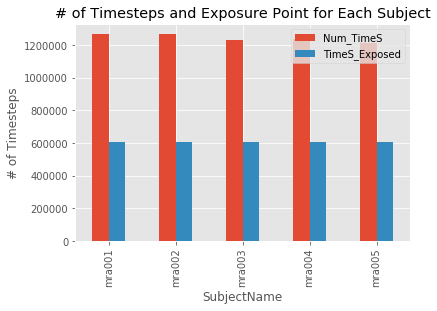

In [10]:
length_exposed_df.plot(y=['Num_TimeS', 'TimeS_Exposed'], kind='bar')
plt.ylabel('# of Timesteps')
plt.title('# of Timesteps and Exposure Point for Each Subject')
